## Task 2: Drug Classification

Download the BBC dataset provided on Moodle. The dataset, created by [Greene and Cunningham, 2006], is a collection of 2225 documents from the BBC news website already categorized into 5 classes: business, entertainment, politics, sport, and tech."

**2.Load the dataset in Python**

In [1]:
import pandas as pd
data_df = pd.read_csv("../data/drug200.csv")
data_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


**3.Plot the distribution of the instances in each class and store the graphic in a file called drug-distribution.pdf. You can use matplotlib.pyplot. This pre-analysis will allow you to determine if the classes are balanced, and which metric is more appropriate to use to evaluate the performance of your classifier.**

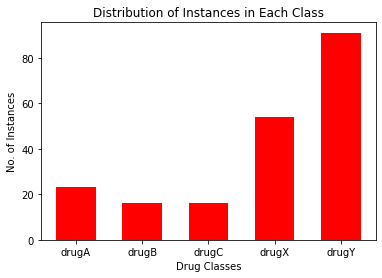

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#drug_data = data_df.to_numpy()

drug_dict = dict()

drug_dict['drugA'] = len(data_df.loc[data_df['Drug']== 'drugA'])
drug_dict['drugB'] = len(data_df.loc[data_df['Drug']== 'drugB'])
drug_dict['drugC'] = len(data_df.loc[data_df['Drug']== 'drugC'])
drug_dict['drugX'] = len(data_df.loc[data_df['Drug']== 'drugX'])
drug_dict['drugY'] = len(data_df.loc[data_df['Drug']== 'drugY'])

classes = list(drug_dict.keys())
instances = list(drug_dict.values())

plt.bar(classes, instances, color = 'red', width = 0.6)

plt.xlabel("Drug Classes")
plt.ylabel("No. of Instances")
plt.title("Distribution of Instances in Each Class")
plt.savefig("../output/drug-distribution.pdf") 
plt.show()





**4.Convert all ordinal and nominal features in numerical format. Make sure that your converted format respects the ordering of ordinal features, and does not introduce any ordering for nominal features. You may want to take a look at pandas.get dummies and pandas.Categorical to do this.**

In [3]:
#Converts nominal column "Sex" to numerical format using pandas.get_dummies function
data_df = pd.get_dummies(data_df, columns=['Sex'])

#Converts ordinal column "BP" to numerical format using pandas.Categorical function
data_df.BP = pd.Categorical(data_df.BP,['LOW','NORMAL','HIGH'],ordered=True)
data_df.BP = data_df.BP.cat.codes

#Converts ordinal column "Cholestrol" to numerical format using pandas.Categorical function
data_df.Cholesterol = pd.Categorical(data_df.Cholesterol,['NORMAL','HIGH'],ordered=True)
data_df.Cholesterol = data_df.Cholesterol.cat.codes

data_df.head()


,Age,BP,Cholesterol,Na_to_K,Drug,Sex_F,Sex_M
0,23,2,1,25.355,drugY,1,0
1,47,0,1,13.093,drugC,0,1
2,47,0,1,10.114,drugC,0,1
3,28,1,1,7.798,drugX,1,0
4,61,0,1,18.043,drugY,1,0


**5.Split the dataset using train test split using the default parameter values.**

In [4]:
from sklearn.model_selection import train_test_split

#Seperates ouput (classes) column from features columns
df_output = data_df.Drug 
df_samples = data_df.drop(columns=['Drug'])

X_train, X_test, y_train, y_test = train_test_split(df_samples, df_output)


**6.Run 6 different classifiers
a) NB: a Gaussian Naive Bayes Classifier (naive bayes.GaussianNB) with the default parameters.**

In [5]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred_gnb = gnb.fit(X_train, y_train).predict(X_test)
#y_pred_gnb

print("Number of mislabeled instances out of a total %d test instances : %d" % (X_test.shape[0], (y_test != y_pred_gnb).sum()))


Number of mislabeled instances out of a total 50 test instances : 6


**b) Base-DT: a Decision Tree (tree.DecisionTreeClassifier) with the default parameters.**

In [6]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
y_pred_tree = clf.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled instances out of a total %d test instances : %d" % (X_test.shape[0], (y_test != y_pred_tree).sum()))



Number of mislabeled instances out of a total 50 test instances : 0


**c)A better performing Decision Tree found using (GridSearchCV).**

In [7]:
from sklearn.model_selection import GridSearchCV


param_dist={
    "criterion":["gini","entropy"],
    "max_depth":[5,10],
    "min_samples_split":[2,4,6]
}

grid = GridSearchCV(clf,param_grid=param_dist)

grid.fit(X_train,y_train)

#Creates new model with best obtained hyper parameters 
clf_grid = DecisionTreeClassifier(criterion=grid.best_params_['criterion'], 
                                  max_depth=grid.best_params_['max_depth'],
                                 min_samples_split=grid.best_params_['min_samples_split'])


y_pred_tree_grid = clf_grid.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled instances out of a total %d test instances : %d" % (X_test.shape[0], (y_test != y_pred_tree_grid).sum()))



Number of mislabeled instances out of a total 50 test instances : 0


**d)A Perceptron (linear model.Perceptron), with default parameter values.**

In [8]:
from sklearn.linear_model import Perceptron

clf_perc = Perceptron()

y_pred_perc = clf_perc.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled instances out of a total %d test instances : %d" % (X_test.shape[0], (y_test != y_pred_perc).sum()))


Number of mislabeled instances out of a total 50 test instances : 23


**e) A Multi-Layered Perceptron (neural network.MLPClassifier) with 1 hidden layer of 100 neurons, sigmoid/logistic as activation function, stochastic gradient descent, and default values for the rest of the parameters.**

In [9]:
from sklearn.neural_network import MLPClassifier

clf_mlp = MLPClassifier(activation = 'logistic', solver = 'sgd')

y_pred_mlp = clf_mlp.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled instances out of a total %d test instances : %d" % (X_test.shape[0], (y_test != y_pred_mlp).sum()))


Number of mislabeled instances out of a total 50 test instances : 22


/Users/gianlucalepore/opt/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


**f) A better performing Multi-Layered Perceptron found using grid search.**

In [10]:
param_mlp={
    "activation":["identity","logistic","tanh","relu"],
    "solver":["adam","sgd"],
    "hidden_layer_sizes":[(30,50),(10,10,10)]
}

clf_mlp_base = MLPClassifier()

grid_mlp = GridSearchCV(clf_mlp_base,param_grid=param_mlp)

grid_mlp.fit(X_train,y_train)

#Creates new model with best obtained hyper parameters 
clf_mlp_grid = MLPClassifier(activation=grid_mlp.best_params_['activation'], 
                                solver=grid_mlp.best_params_['solver'],
                               hidden_layer_sizes=grid_mlp.best_params_['hidden_layer_sizes'])

y_pred_mlp_grid = clf_mlp_grid.fit(X_train, y_train).predict(X_test)

print("Numbers of mislabeled instances out of a total %d test instances : %d" % (X_test.shape[0], (y_test != y_pred_mlp_grid).sum()))





/Users/gianlucalepore/opt/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/gianlucalepore/opt/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/gianlucalepore/opt/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/gianlucalepore/opt/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum ite

/Users/gianlucalepore/opt/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/gianlucalepore/opt/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/gianlucalepore/opt/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/gianlucalepore/opt/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum ite

/Users/gianlucalepore/opt/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/gianlucalepore/opt/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/gianlucalepore/opt/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/gianlucalepore/opt/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum ite

Numbers of mislabeled instances out of a total 50 test instances : 7


/Users/gianlucalepore/opt/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


**For each of the 6 classifier above, append the following information in a file called drugs-performance.txt:**

**NB: Gaussian Naive Bayes**

**a) Clear seperator and a string clearly describing the model**

In [11]:
# Create files to be appended to
file_performance = open("../output/drug-performance.txt","a")
file_discussion = open("../output/drug-discussion.txt","a")

# Clear contents
file_performance.truncate(0)
file_discussion.truncate(0)

# Seperator
def write_seperator_to_file():
    file_performance.write("\n---------------------------------------------------------------------\n")

# Writes model's name
def write_model_name_to_file(model_name):
    
    file_performance.write("\n (a) **** {model_name} ****\n\n".format(model_name=model_name))
    file_performance.write("\n")
    
write_seperator_to_file()
write_model_name_to_file("Gaussian Naive Bayes")


**b) Confusion Matrix**

In [12]:
from sklearn.metrics import confusion_matrix

cf_matrix_gnb = confusion_matrix(y_test,y_pred_gnb)

def print_confusion_matrix(cf_matrix):
    print('Confusion Matrix:\n {cf_matrix}'.format(cf_matrix=cf_matrix))
    
def write_confusion_matrix_to_file(cf_matrix):
    file_performance.write("(b) Confusion Matrix" + "\n\n")
    np.savetxt(file_performance, X=cf_matrix.astype(int), fmt ='%i\t')
    file_performance.write("\n")
    
print_confusion_matrix(cf_matrix_gnb)
write_confusion_matrix_to_file(cf_matrix_gnb)


Confusion Matrix:
 [[ 6  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 13  0]
 [ 3  0  3  0 15]]


**c) Precision, Recall and F1-measure**

In [13]:
from sklearn import metrics

def print_classification_report(y_test, y_predicted):
    report = metrics.classification_report(y_test, y_predicted)
    print(report)
    
def write_classification_report_to_file(y_test, y_predicted):
    report = metrics.classification_report(y_test, y_predicted)
    file_performance.write("(c) Classification Report\n\n" + report)
    file_performance.write("\n")

#print(y_test)
#print(y_pred_gnb)
    
print_classification_report(y_test, y_pred_gnb)
write_classification_report_to_file(y_test, y_pred_gnb)

              precision    recall  f1-score   support

       drugA       0.67      1.00      0.80         6
       drugB       1.00      1.00      1.00         6
       drugC       0.57      1.00      0.73         4
       drugX       1.00      1.00      1.00        13
       drugY       1.00      0.71      0.83        21

    accuracy                           0.88        50
   macro avg       0.85      0.94      0.87        50
weighted avg       0.93      0.88      0.88        50



**d) Accuracy, Macro-average F1 and weighted-average F1**

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

def print_scores(y_test,y_predicted):
    print("Accuracy Score: ", accuracy_score(y_test, y_predicted))
    print("Macro-Average F1: ", f1_score(y_test, y_predicted, average="macro"))
    print("Weighted-Average F1: ", f1_score(y_test, y_predicted, average="weighted"))
    
def write_scores_to_file(y_test,y_predicted):
    file_performance.write("(d) Accuracy, Macro-Average F1 and Weighted-Average F1\n\n")
    file_performance.write("Accuracy Score: " + str(accuracy_score(y_test, y_predicted)) + "\n")
    file_performance.write("Macro-Average F1: " + str(f1_score(y_test, y_predicted, average="macro")) + "\n")
    file_performance.write("Weighted-Average F1: " + str(f1_score(y_test, y_predicted, average="weighted")) + "\n")
    file_performance.write("\n")
    
print_scores(y_test, y_pred_gnb)
write_scores_to_file(y_test,y_pred_gnb)

**Base-DT: Decision Tree**

In [14]:
file_performance.close()
file_discussion.close()